In [ ]:
import nltk 
#from numba import jit, cuda 
nltk.download('brown')
nltk.download('universal_tagset')
from collections import defaultdict, Counter
from time import time

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [ ]:
tag_sent = nltk.corpus.brown.tagged_sents(tagset='universal')
po=set([y[1] for x in tag_sent for y in x])
print(tag_sent[0])

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]


In [ ]:
tag_sent_proc = [[('^', '^')]+x+[('$', '$')] for x in tag_sent]
po1 = [[y[1] for y in x] for x in tag_sent_proc]
print(po1[0])

['^', 'DET', 'NOUN', 'NOUN', 'ADJ', 'NOUN', 'VERB', 'NOUN', 'DET', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'NOUN', 'NOUN', 'VERB', '.', 'DET', 'NOUN', '.', 'ADP', 'DET', 'NOUN', 'VERB', 'NOUN', '.', '$']


In [ ]:
def get_total(tag_sent_proc):
  total = [tup for sent in tag_sent_proc for tup in sent ]
  return total

In [ ]:
#total = get_total(tag_sent_proc)

In [ ]:
def get_posc(total):
  pos_counts = Counter(pos for _, pos in total)
  return pos_counts

In [ ]:
#pos_counts = Counter(pos for _, pos in total)
# print(pos_counts)

In [ ]:
# #emission probability
# word_tags = defaultdict(Counter)
# for word, pos in total:
#     word_tags[word][pos] +=1
# print(word_tags['My'])

In [ ]:
def get_wordt(total):
  word_tags = defaultdict(Counter)
  for word, pos in total:
    word_tags[word][pos] +=1
  return word_tags

In [ ]:
# word_tag = get_wordt(total)
# print(word_tag["Ali"]["NN"])

In [ ]:
# #transition probability
# trans_count = defaultdict(Counter)
# for x in tag_sent_proc:
#   for ind in range(len(x)-1):
#     trans_count[x[ind][1]][x[ind+1][1]]+=1
# print(trans_count['NN'])

In [ ]:
def get_transc(tag_sent_proc):
  trans_count = defaultdict(Counter)
  for x in tag_sent_proc:
    for ind in range(len(x)-1):
      trans_count[x[ind][1]][x[ind+1][1]]+=1
  return trans_count

In [ ]:
# print(len(pos_counts))

In [ ]:
def eprob(tag, word):
  global word_tags
  global pos_counts
  num = word_tags[word][tag]  
  tot = pos_counts[tag]
  prob = (num+1)/(tot+len(word_tags)+1)
  return prob
#print(tprob('NP', 'Name', ))

In [ ]:
def tprob(tag1, tag2):
  global trans_count
  global pos_counts
  num = trans_count[tag1][tag2]
  tot = pos_counts[tag1]
  prob = (num+1)/(tot+len(pos_counts))
  return prob
#print(eprob('^', 'NN-TL'))

In [ ]:
def viterbi_acc(tup):
  global pos_counts
  global trans_count
  global word_tags
  global L
  word_list = tup[0]
  test_y = tup[1]
  #print("a")
  t = len(word_list)
  n = len(pos_counts)
  seq_sc = defaultdict(Counter)
  for key in pos_counts:
    seq_sc[0][key] = 0.0
  seq_sc[0]['^'] = 1.0
  bacptr = defaultdict(Counter)
  bacptr[0]['^'] = 0
  for ind in range(1,len(word_list)-1):
    #print(word_list[ind])
    #print(seq_sc[0])
    for key in pos_counts:
      seq_sc[1][key] = 0.0
      for prev_k in pos_counts:
        state_prob = eprob(key, word_list[ind])*tprob(prev_k, key)*seq_sc[0][prev_k]
        if(seq_sc[1][key]<state_prob):
          seq_sc[1][key] = state_prob
          bacptr[ind][key] = prev_k
    for key in pos_counts:
      seq_sc[0][key] = seq_sc[1][key]
  
  tags = [None]*t
  tags[t-1] = '$'
  tags[t-2] = '$'
  for k in pos_counts:
    if(seq_sc[1][k]>seq_sc[1][tags[t-2]]):
      tags[t-2] = k
      #print(k)
  for i in range(t-3, 0, -1):
    tags[i] = bacptr[i+1][tags[i+1]]
  tags[0] = '^'
  tags = np.array(tags)
  bool_v = (tags==test_y)
  #print(bool_v)
  pos = sum(bool_v)
  L.append(tags)
  
  return pos

In [ ]:
# tags = viterbi(['^', 'My', 'name', 'is', 'Red', '$'])
# print(tags)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
# @jit
# def calc_acc(pred, y, tot):
#   #print(pred.shape, y.shape)
#   bool_m = np.array([pred[i]==y[i] for i in range(pred.shape[0])])
#   #print(bool_m)
#   pos = np.array([sum(x) for x in bool_m])
#   #print(pos)
#   acc = np.sum(pos)/tot
#   return acc

In [ ]:
# total = get_total(tag_sent_proc)
# pos_c = get_posc(total)
# word_t = get_wordt(total)
# trans_c = get_transc(tag_sent_proc)
# test_x = [[y[0]  for y in x] for x in tag_sent_proc]
# print("hereh")
# pred = viterbi(test_x[0], pos_c, trans_c, word_t)
# print(pred)
# print(np.array(test_x[0]).shape)
# test_y = [[y[1] for y in x] for x in tag_sent_proc]
# print(len(test_y[0]))
# acc = calc_acc(np.array(pred), np.array(test_y[0]), len(test_y))
# print(acc)

In [ ]:
kfold = KFold(5, True, 1)
tag_sent_proc = np.array(tag_sent_proc)
y_preds = []
y_trues = []
for train, test in kfold.split(tag_sent_proc):
  L = []
  print('train: , test: ' )#% (tag_sent_proc[train][0], tag_sent_proc[test][0]))
  test_x = [[y[0]  for y in x] for x in tag_sent_proc[test]]
  num = [len(x) for x in tag_sent_proc[test]]
  tot = sum(num)
  test_y = np.array([np.array([y[1] for y in x]) for x in tag_sent_proc[test]])
  total = get_total(tag_sent_proc[train])
  pos_counts = get_posc(total)
  word_tags = get_wordt(total)
  trans_count = get_transc(tag_sent_proc[train])
  tuplist=[(test_x[ind],test_y[ind]) for ind in range(len(test_x))]
  out = np.empty(len(tuplist), dtype=object)
  out[:] = tuplist
  #print(tuplist)
  fvec=lambda x:viterbi_acc((x[0], x[1]))
  fvec1=np.vectorize(fvec,otypes=[float])
  start = time()
  tp = fvec1(out)
  end = time()
  print(end-start)
  y_pred = np.concatenate(L)
  print(y_pred.shape)
  y_preds.append(y_pred)
  y_true = np.concatenate(test_y)
  print(y_true.shape)
  y_trues.append(y_true)
  #print(test_x[2])
  #print(pred[1])
  #print(np.asarray(pred).shape)
  acc = sum(tp)/tot
  print(acc)

train: , test: 
72.02064919471741
(255367,)
(255367,)
0.9385472672663265
train: , test: 
71.947500705719
(254753,)
(254753,)
0.9375905288652145
train: , test: 
70.67406344413757
(255381,)
(255381,)
0.9368394673057119
train: , test: 
72.67025232315063
(255782,)
(255782,)
0.9376891258962711
train: , test: 
71.20348715782166
(254589,)
(254589,)
0.9380020346519292


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

def get_report(y_true, y_pred, classes):
    clf_report = classification_report(y_true, y_pred, labels=classes, zero_division=0)
    clf_report = clf_report.replace('\n\n', '\n')
    clf_report = clf_report.replace('macro avg', 'macro_avg')
    clf_report = clf_report.replace('micro avg', 'micro_avg')
    clf_report = clf_report.replace('weighted avg', 'weighted_avg')
    clf_report = clf_report.replace(' / ', '/')
    lines = clf_report.split('\n')

    class_names, plotMat, support = [], [], []
    for line in lines[1:]:
        t = line.strip().split()
        if len(t) < 2:
            continue
        v = [float(x) for x in t[1: len(t) - 1]]
        if len(v) == 1 : v = v * 3
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)
    plotMat = np.array(plotMat)
    support = np.array(support)
    return class_names, plotMat, support

def get_scores(y_true, y_pred, classes):
    correct, wrong = {}, {}
    for tag in classes:
        correct[tag] = 0
        wrong[tag] = 0
        
    for tag, pred in zip(y_true, y_pred):
        if tag in correct and tag == pred:
            correct[tag] += 1
        elif tag in wrong:
            wrong[tag] += 1
            
    scores = []
    total = len(y_true)
    for tag in classes:
        cur = np.array([correct[tag], wrong[tag]])
        scores.append(cur / total)
    return np.array(scores)
    
def plot_confusion_matrix(classes, mat, normalize=True, cmap=plt.cm.Blues):
    cm = np.copy(mat)
    title = 'Confusion Matrix (without normalization)'
    if normalize:
        cm = cm.astype('float') / np.sum(cm, axis=1, keepdims=True)
        title = title.replace('without', 'with')
    plt.clf()    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_title(title, y=-0.06, fontsize=22)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = np.max(cm) / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = "white" if (cm[i, j] > thresh) else "black"
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color=color)
    plt.ylabel('True label',fontsize=22)
    plt.xlabel('Predicted label', fontsize=22)
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', bbox_inches="tight", transparent=True)
    
def plot_clf_report(classes, plotMat, support, cmap=plt.cm.Blues):
    title = 'Classification Report'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(classes[idx], sup) for idx, sup in enumerate(support)]
    plt.clf()
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_title(title, y=-0.06, fontsize=22)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=14)
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=0)
    plt.yticks(np.arange(len(classes)), yticklabels)

    thresh = np.max(plotMat) / 2
    for i in range(plotMat.shape[0]):
        for j in range(plotMat.shape[1]):
            color = "white" if (plotMat[i, j] > thresh) else "black"
            plt.text(j, i, format(plotMat[i, j], '.2f'), horizontalalignment="center", color=color, fontsize=14)

    plt.xlabel('Metrics',fontsize=22)
    plt.ylabel('Classes',fontsize=22)
    plt.tight_layout()
    plt.savefig('classification_report.png', bbox_inches="tight", transparent=True)
    
def plot_tag_scores(classes, scores, normalize=True):
    plt.clf()
    width = 0.45
    fig, ax = plt.subplots(figsize=(20,10))
    ax.xaxis.set_tick_params(labelsize=18, rotation=25)
    ax.yaxis.set_tick_params(labelsize=18)
    range_bar1 = np.arange(len(classes))
    rects1 = ax.bar(range_bar1, tuple(scores[:, 0]), width, color='b')
    rects2 = ax.bar(range_bar1 + width, tuple(scores[:, 1]), width, color='r')

    ax.set_ylabel('Scores',fontsize=22)
    ax.set_title('Tag scores', fontsize=22)
    ax.set_xticks(range_bar1 + width / 2)
    ax.set_xticklabels(classes)

    ax.legend((rects1[0], rects2[0]), ('Correct', 'Wrong'), fontsize=20)
    plt.legend()
    plt.savefig('tag_scores.png', bbox_inches="tight", transparent=True)
    plt.show()

In [ ]:
total = get_total(tag_sent_proc)
pos_counts = get_posc(total)
tagset = set()
tagset.update(pos_counts)
tagset.discard('^')
tagset.discard('$')
print(tagset)

{'ADJ', 'NOUN', 'VERB', 'NUM', 'ADV', 'CONJ', '.', 'DET', 'PRON', 'ADP', 'X', 'PRT'}


In [ ]:
print(y_preds)

[array(['^', 'PRON', 'VERB', ..., 'NOUN', '.', '$'], dtype='<U4'), array(['^', 'DET', 'ADJ', ..., 'DET', 'NOUN', '$'], dtype='<U4'), array(['^', 'DET', 'NOUN', ..., 'NOUN', '.', '$'], dtype='<U4'), array(['^', 'DET', 'NOUN', ..., 'ADV', '.', '$'], dtype='<U4'), array(['^', 'DET', 'NOUN', ..., 'ADV', '.', '$'], dtype='<U4')]


In [ ]:
classes = list(tagset)
class_names = None
report = None
support = None
cm, scores = None, None
cnt = 0
print(classes)
for y_true, y_pred in zip(y_trues, y_preds):
    print(y_true)
    print(y_pred)
    class_names, report_, support_ = get_report(y_true, y_pred, classes)
    cm_ = confusion_matrix(y_true, y_pred, labels=classes)
    scores_ = get_scores(y_true, y_pred, classes)
    
    if report is None : report = np.zeros_like(report_, dtype=np.float64)
    report += report_
    
    if support is None : support = np.zeros_like(support_, dtype=np.float64)
    support += support_
    
    if cm is None : cm = np.zeros_like(cm_, dtype=np.float64)
    cm += cm_
    
    if scores is None : scores = np.zeros_like(scores_, dtype=np.float64)
    scores += scores_
    
    cnt += 1
    
report /= cnt
support /= cnt
cm /= cnt
scores /= cnt

['ADJ', 'NOUN', 'VERB', 'NUM', 'ADV', 'CONJ', '.', 'DET', 'PRON', 'ADP', 'X', 'PRT']
['^' 'PRON' 'VERB' ... 'NOUN' '.' '$']
['^' 'PRON' 'VERB' ... 'NOUN' '.' '$']
['^' 'DET' 'NOUN' ... 'DET' 'NOUN' '$']
['^' 'DET' 'ADJ' ... 'DET' 'NOUN' '$']
['^' 'DET' 'NOUN' ... 'NOUN' '.' '$']
['^' 'DET' 'NOUN' ... 'NOUN' '.' '$']
['^' 'DET' 'NOUN' ... 'ADV' '.' '$']
['^' 'DET' 'NOUN' ... 'ADV' '.' '$']
['^' 'DET' 'NOUN' ... 'VERB' '.' '$']
['^' 'DET' 'NOUN' ... 'ADV' '.' '$']


<Figure size 432x288 with 0 Axes>

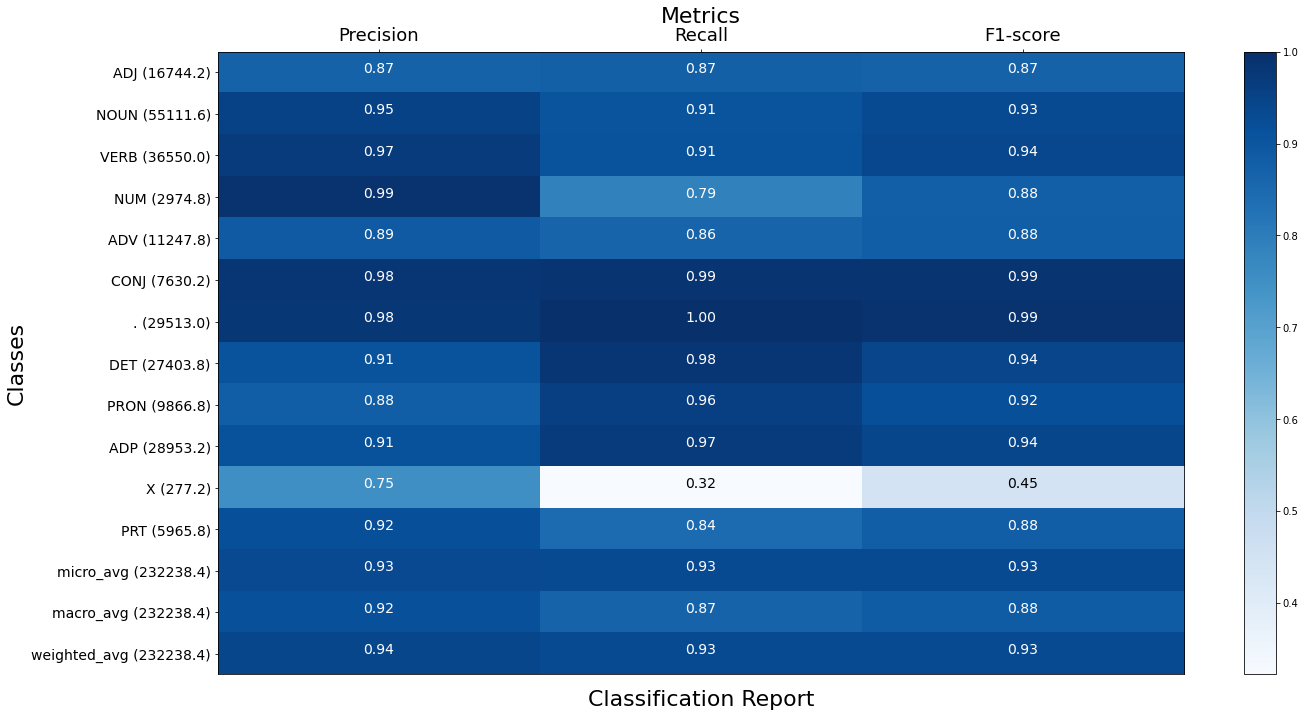

In [ ]:
plot_clf_report(class_names, report, support)

<Figure size 432x288 with 0 Axes>

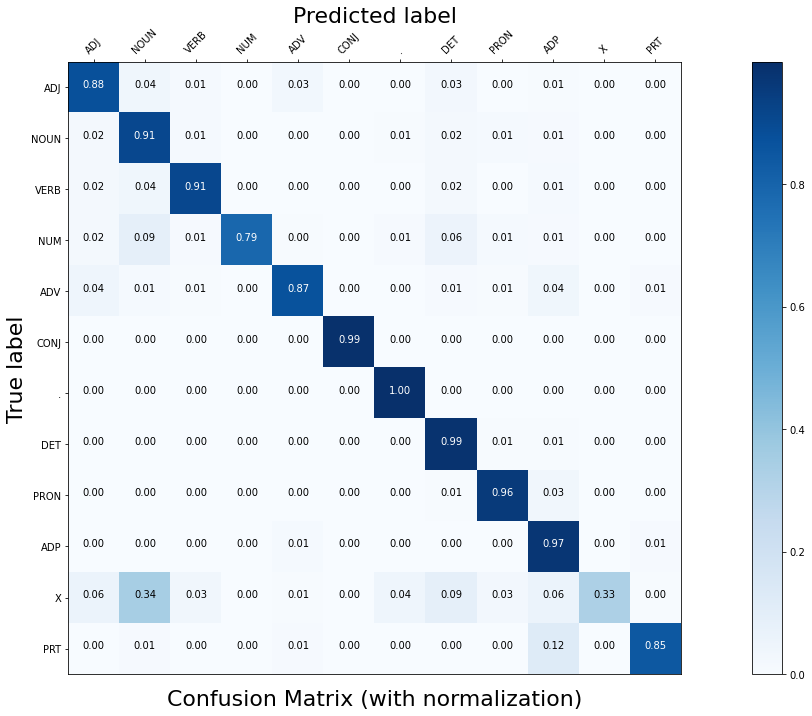

In [ ]:
plot_confusion_matrix(classes, cm)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

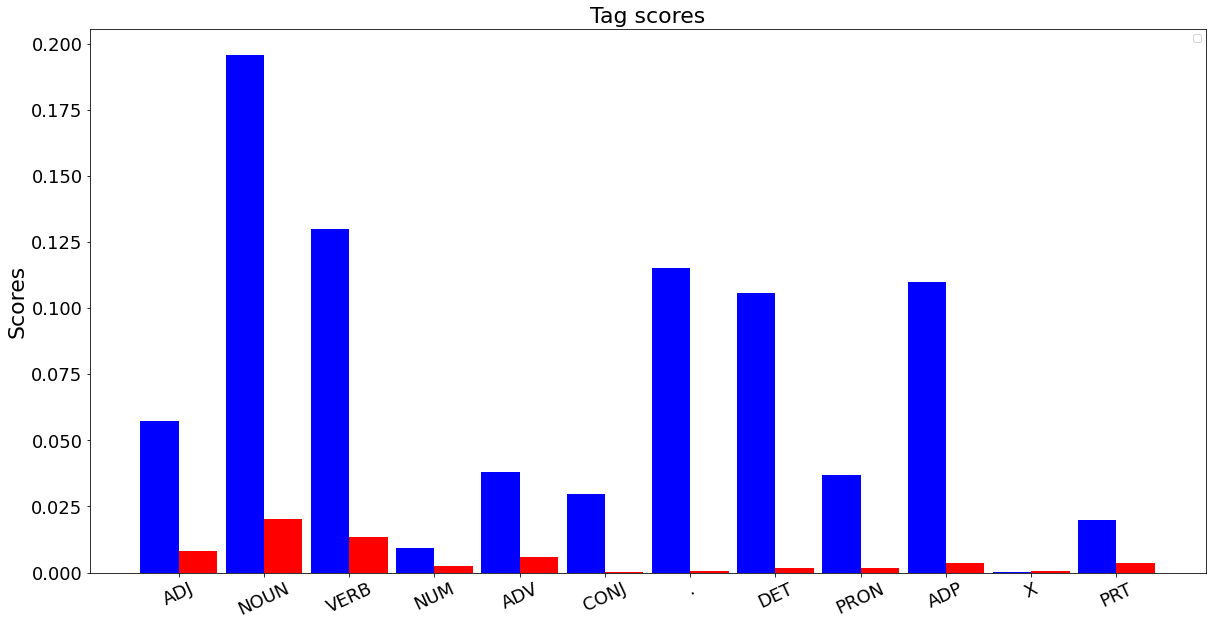

In [ ]:
plot_tag_scores(classes, scores)